In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_ljungbox
import seaborn as sns
import matplotlib.pyplot as plt


Read and Clean Data

In [3]:
data_path = '/content/drive/My Drive/Data/Coke_Data.csv'
coke_dat = pd.read_csv(data_path)

# preview data
coke_dat.head
print(coke_dat)



     YEAR  QTR     SALES    T  Q1  Q2  Q3
0    1980    1  1215.655    1   1   0   0
1    1980    2  1549.533    2   0   1   0
2    1980    3  1418.384    3   0   0   1
3    1980    4  1437.177    4   0   0   0
4    1981    1  1346.462    5   1   0   0
..    ...  ...       ...  ...  ..  ..  ..
103  2005    4  5551.000  104   0   0   0
104  2006    1  5226.000  105   1   0   0
105  2006    2  6476.000  106   0   1   0
106  2006    3  6454.000  107   0   0   1
107  2006    4  5932.000  108   0   0   0

[108 rows x 7 columns]


Create a time plot of SALES

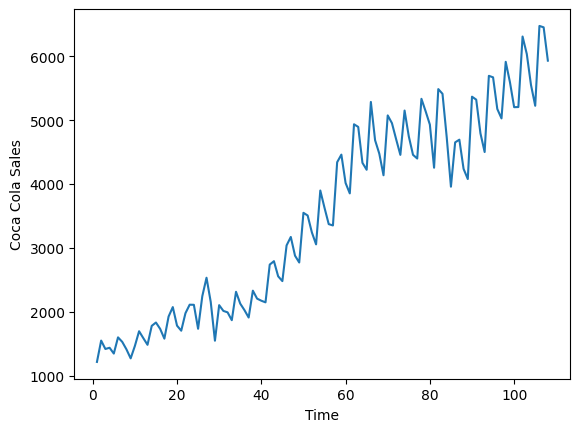

In [4]:
plt.plot(coke_dat['T'],coke_dat['SALES'])

# Add labels and a title
plt.xlabel("Time")
plt.ylabel("Coca Cola Sales")

# Show the plot
plt.show()





Fit the Full Regression Model

In [5]:
# Fit full regression
X = coke_dat[['T', 'Q1', 'Q2', 'Q3']]
y = coke_dat['SALES']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     425.9
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           4.24e-63
Time:                        18:17:45   Log-Likelihood:                -791.26
No. Observations:                 108   AIC:                             1593.
Df Residuals:                     103   BIC:                             1606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        806.4305     97.453      8.275      0.0

Examine scatter plot of residuals to check for independence

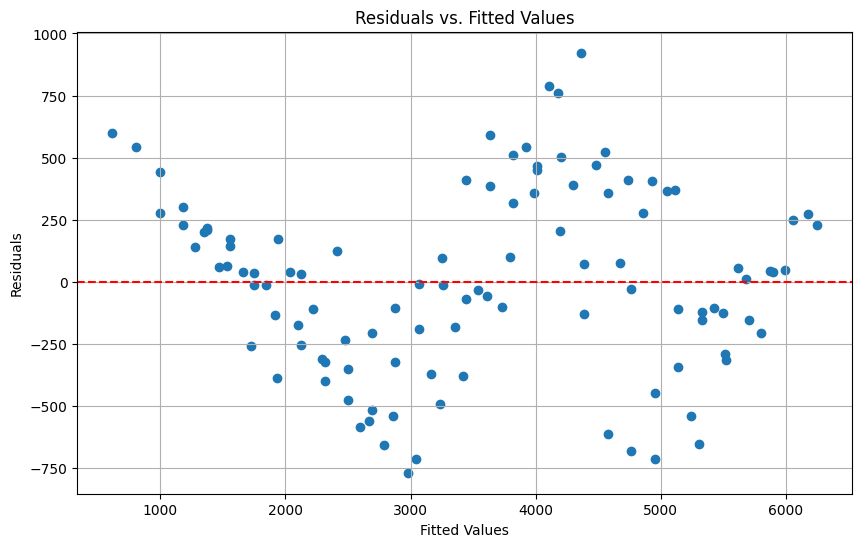

In [6]:
# Calculate residuals
residuals = fullreg.resid



# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(fullreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

Use the LjungBox Test to determine whether the residuals are white noise

In [7]:
#execute the Ljung Box test on the residuals from the linear regression using 10 lags
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)



,lb_stat,lb_pvalue
10,325.374987,6.632359e-64


Add a lagged values of SALES to the model to represent the autocorrelation

In [8]:
#Fit regression model with lagged value of SALES
#Add lagged value of SALES to data frame

coke_dat['SALES_1'] = coke_dat['SALES'].shift(1)

print(coke_dat)

#drop row with missing value for SALES_1 from data frame
coke_dat_1 = coke_dat.dropna()

#Fit regression
X = coke_dat_1[['T', 'Q1', 'Q2', 'Q3','SALES_1']]
y = coke_dat_1['SALES']
X = sm.add_constant(X)
lagreg = sm.OLS(y, X).fit()

# Display regression summary
print(lagreg.summary())



     YEAR  QTR     SALES    T  Q1  Q2  Q3   SALES_1
0    1980    1  1215.655    1   1   0   0       NaN
1    1980    2  1549.533    2   0   1   0  1215.655
2    1980    3  1418.384    3   0   0   1  1549.533
3    1980    4  1437.177    4   0   0   0  1418.384
4    1981    1  1346.462    5   1   0   0  1437.177
..    ...  ...       ...  ...  ..  ..  ..       ...
103  2005    4  5551.000  104   0   0   0  6037.000
104  2006    1  5226.000  105   1   0   0  5551.000
105  2006    2  6476.000  106   0   1   0  5226.000
106  2006    3  6454.000  107   0   0   1  6476.000
107  2006    4  5932.000  108   0   0   0  6454.000

[108 rows x 8 columns]
                            OLS Regression Results                            
Dep. Variable:                  SALES   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     922.4
Date:                Tue, 05 Sep 202

Examine the residuals to determine whether autocorrelation still exists

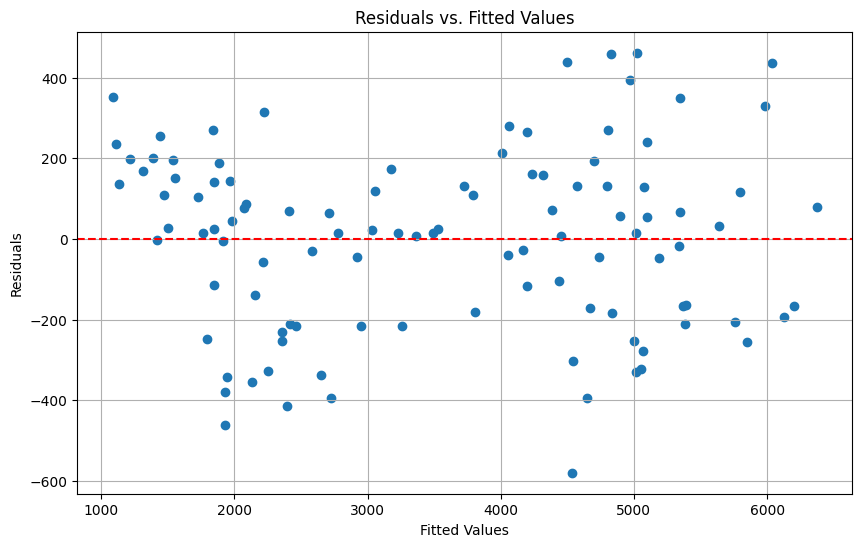

In [17]:
# Calculate residuals
residuals = lagreg.resid

# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(lagreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()